In [1]:
from surprise import KNNWihtMeans
from surprise import Dataset
from surprise import accuracy
from surprise.omdel_selection import train_test_split

ModuleNotFoundError: No module named 'surprise'

In [2]:
$ pip install numpy
$ pip install scikit-surprise

SyntaxError: invalid syntax (Temp/ipykernel_17252/575856277.py, line 1)

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
import numpy as np
import pandas as pd

In [3]:
import os

In [4]:
os.chdir('C:\pro\Datasets')

In [5]:
items=pd.read_csv('GROCERIES.csv')

In [6]:
ratings=pd.read_csv('RATINGS.csv')

In [7]:
print(ratings.shape)

(280, 4)


In [14]:
items.isnull().sum()

itemid         0
Title          0
category       0
item_rating    0
image          0
discription    9
price          0
dtype: int64

In [15]:
ratings.isnull().sum()

userid       0
itemid       0
rating       0
timestamp    0
dtype: int64

In [17]:
ratings.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
275    False
276    False
277    False
278    False
279    False
Length: 280, dtype: bool

In [18]:
##popularity based

In [8]:
ratings_with_name=ratings.merge(items,on='itemid')

In [9]:
num_rating_df=ratings_with_name.groupby('Title').count()['rating'].reset_index()

In [10]:
ratings_with_name

,userid,itemid,rating,timestamp,Title,category,item_rating,image,discription,price
0,1,2,4.0,964982703,"Fresho Green Peas, 500 gm",FruitVegetables,5,https://www.google.com/search?q=10000283_11-fr...,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
1,2,2,3.0,1445714835,"Fresho Green Peas, 500 gm",FruitVegetables,5,https://www.google.com/search?q=10000283_11-fr...,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
2,3,2,5.0,1306463611,"Fresho Green Peas, 500 gm",FruitVegetables,5,https://www.google.com/search?q=10000283_11-fr...,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
3,4,2,2.0,945079259,"Fresho Green Peas, 500 gm",FruitVegetables,5,https://www.google.com/search?q=10000283_11-fr...,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
4,5,2,5.0,847435337,"Fresho Green Peas, 500 gm",FruitVegetables,5,https://www.google.com/search?q=10000283_11-fr...,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
...,...,...,...,...,...,...,...,...,...,...
275,1,38,4.0,964982271,Soap,FruitVegetables,3,2.jpg,Its Just a Soap,200.0
276,3,38,0.5,1306463595,Soap,FruitVegetables,3,2.jpg,Its Just a Soap,200.0
277,4,38,5.0,964622565,Soap,FruitVegetables,3,2.jpg,Its Just a Soap,200.0
278,7,38,3.0,1106635653,Soap,FruitVegetables,3,2.jpg,Its Just a Soap,200.0


In [11]:
num_rating_df.rename(columns={'rating':'num_ratings'},inplace=True)

In [12]:
avg_rating_df=ratings_with_name.groupby('Title').mean()['rating'].reset_index()
avg_rating_df.rename(columns={'rating':'avg_ratings'},inplace=True)
avg_rating_df

,Title,avg_ratings
0,"Amul Lassi - Rose Flavor, 200 ml Carton",3.277778
1,"Bauli Spyroll, 37 gm",3.500000
2,"Bisleri Mineral Water, 24x500 ml Multi P",3.625000
3,"Bournvita Pro-Health Chocolate Drink, 2x",3.125000
4,"Cadbury Oreo Creme Biscuit - Vanilla, 51",4.062500
5,"Daawat Basmati Rice - Rozana Super 90, 5",3.500000
6,"Fresho Banana - Robusta, 1 kg",3.666667
7,"Fresho Banana - Robusta, 500 g",3.500000
8,"Fresho Green Peas, 500 gm",3.555556
9,"Fresho Ladies Finger, 1 kg",3.222222


In [13]:
popular_df=num_rating_df.merge(avg_rating_df,on='Title')

In [14]:
popular_df

,Title,num_ratings,avg_ratings
0,"Amul Lassi - Rose Flavor, 200 ml Carton",9,3.277778
1,"Bauli Spyroll, 37 gm",9,3.500000
2,"Bisleri Mineral Water, 24x500 ml Multi P",8,3.625000
3,"Bournvita Pro-Health Chocolate Drink, 2x",8,3.125000
4,"Cadbury Oreo Creme Biscuit - Vanilla, 51",8,4.062500
5,"Daawat Basmati Rice - Rozana Super 90, 5",9,3.500000
6,"Fresho Banana - Robusta, 1 kg",9,3.666667
7,"Fresho Banana - Robusta, 500 g",7,3.500000
8,"Fresho Green Peas, 500 gm",9,3.555556
9,"Fresho Ladies Finger, 1 kg",9,3.222222


In [15]:
popular_df=popular_df[popular_df['num_ratings']>=7].sort_values('avg_ratings',ascending=False)

In [16]:
popular_df=popular_df.merge(items,on='Title').drop_duplicates('Title')[['Title','category','image','num_ratings','avg_ratings']]

In [17]:
popular_df

,Title,category,image,num_ratings,avg_ratings
0,Lizol Disinfectant Surface Cleaner,Cleaninghousehold,1202437_4-lizol-disinfectant-surface-cleaner-c...,8,4.437500
1,"bb Royal Whole Wheat Atta, 5 kg",FoodgrainsoilMasala,40099240_8-bb-royal-whole-wheat-atta.jpg,9,4.388889
2,"Cadbury Oreo Creme Biscuit - Vanilla, 51",SnacksBrandedFoods,100423120_22-cadbury-oreo-creme-biscuit-vanill...,8,4.062500
3,"Vim Dishwash Bar, 300 gm",Cleaninghousehold,306160_20-vim-dishwash-bar.jpg,8,4.062500
4,"Kelloggs Chocos, 1.2 kg",SnacksBrandedFoods,30008601_8-kelloggs-chocos.jpg,8,3.937500
5,"Madhur Sugar - Refined, 5 kg Pouch",FoodgrainsoilMasala,214431_6-madhur-sugar-refined.jpg,9,3.833333
6,"Fresho Tomato - Hybrid, 1 kg",FruitVegetables,10000200_17-fresho-tomato-hybrid.jpg,9,3.833333
7,"Parle Biscuits - Monaco Salted Snack, 3x",SnacksBrandedFoods,1200146_3-parle-biscuits-monaco-salted-snack.jpg,7,3.785714
8,"Fresho Banana - Robusta, 1 kg",FruitVegetables,10000025_24-fresho-banana-robusta.jpg,9,3.666667
9,"Bisleri Mineral Water, 24x500 ml Multi P",Beverage,1200137_1-bisleri-mineral-water.jpg,8,3.625000


# # Collaborative


In [18]:
x=ratings_with_name.groupby('userid').count()['rating']>20
rated_users=x[x].index

In [66]:
filtered_rating=ratings_with_name[ratings_with_name['userid'].isin(rated_users)]

KeyError: 'userid'

In [19]:
ratings_with_name

,userid,itemid,rating,timestamp,Title,category,item_rating,image,discription,price
0,1,2,4.0,964982703,"Fresho Green Peas, 500 gm",FruitVegetables,5,https://www.google.com/search?q=10000283_11-fr...,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
1,2,2,3.0,1445714835,"Fresho Green Peas, 500 gm",FruitVegetables,5,https://www.google.com/search?q=10000283_11-fr...,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
2,3,2,5.0,1306463611,"Fresho Green Peas, 500 gm",FruitVegetables,5,https://www.google.com/search?q=10000283_11-fr...,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
3,4,2,2.0,945079259,"Fresho Green Peas, 500 gm",FruitVegetables,5,https://www.google.com/search?q=10000283_11-fr...,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
4,5,2,5.0,847435337,"Fresho Green Peas, 500 gm",FruitVegetables,5,https://www.google.com/search?q=10000283_11-fr...,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
...,...,...,...,...,...,...,...,...,...,...
275,1,38,4.0,964982271,Soap,FruitVegetables,3,2.jpg,Its Just a Soap,200.0
276,3,38,0.5,1306463595,Soap,FruitVegetables,3,2.jpg,Its Just a Soap,200.0
277,4,38,5.0,964622565,Soap,FruitVegetables,3,2.jpg,Its Just a Soap,200.0
278,7,38,3.0,1106635653,Soap,FruitVegetables,3,2.jpg,Its Just a Soap,200.0


In [20]:
ratings_with_name=ratings.merge(items,on='itemid')

In [21]:
ratings_with_name['userid'].isin(rated_users)

0       True
1       True
2       True
3       True
4       True
       ...  
275     True
276     True
277     True
278     True
279    False
Name: userid, Length: 280, dtype: bool

In [22]:
ratings_with_name[ratings_with_name['userid'].isin(rated_users)]

,userid,itemid,rating,timestamp,Title,category,item_rating,image,discription,price
0,1,2,4.0,964982703,"Fresho Green Peas, 500 gm",FruitVegetables,5,https://www.google.com/search?q=10000283_11-fr...,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
1,2,2,3.0,1445714835,"Fresho Green Peas, 500 gm",FruitVegetables,5,https://www.google.com/search?q=10000283_11-fr...,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
2,3,2,5.0,1306463611,"Fresho Green Peas, 500 gm",FruitVegetables,5,https://www.google.com/search?q=10000283_11-fr...,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
3,4,2,2.0,945079259,"Fresho Green Peas, 500 gm",FruitVegetables,5,https://www.google.com/search?q=10000283_11-fr...,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
4,5,2,5.0,847435337,"Fresho Green Peas, 500 gm",FruitVegetables,5,https://www.google.com/search?q=10000283_11-fr...,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
...,...,...,...,...,...,...,...,...,...,...
273,7,37,3.0,1107127060,soap,Cleaninghousehold,4,3.jpg,Its just a Soap,22.0
275,1,38,4.0,964982271,Soap,FruitVegetables,3,2.jpg,Its Just a Soap,200.0
276,3,38,0.5,1306463595,Soap,FruitVegetables,3,2.jpg,Its Just a Soap,200.0
277,4,38,5.0,964622565,Soap,FruitVegetables,3,2.jpg,Its Just a Soap,200.0


In [23]:
filtered_rating=ratings_with_name[ratings_with_name['userid'].isin(rated_users)].shape

In [24]:
filtered_rating=ratings_with_name[ratings_with_name['userid'].isin(rated_users)]

In [25]:
filtered_rating

,userid,itemid,rating,timestamp,Title,category,item_rating,image,discription,price
0,1,2,4.0,964982703,"Fresho Green Peas, 500 gm",FruitVegetables,5,https://www.google.com/search?q=10000283_11-fr...,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
1,2,2,3.0,1445714835,"Fresho Green Peas, 500 gm",FruitVegetables,5,https://www.google.com/search?q=10000283_11-fr...,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
2,3,2,5.0,1306463611,"Fresho Green Peas, 500 gm",FruitVegetables,5,https://www.google.com/search?q=10000283_11-fr...,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
3,4,2,2.0,945079259,"Fresho Green Peas, 500 gm",FruitVegetables,5,https://www.google.com/search?q=10000283_11-fr...,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
4,5,2,5.0,847435337,"Fresho Green Peas, 500 gm",FruitVegetables,5,https://www.google.com/search?q=10000283_11-fr...,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
...,...,...,...,...,...,...,...,...,...,...
273,7,37,3.0,1107127060,soap,Cleaninghousehold,4,3.jpg,Its just a Soap,22.0
275,1,38,4.0,964982271,Soap,FruitVegetables,3,2.jpg,Its Just a Soap,200.0
276,3,38,0.5,1306463595,Soap,FruitVegetables,3,2.jpg,Its Just a Soap,200.0
277,4,38,5.0,964622565,Soap,FruitVegetables,3,2.jpg,Its Just a Soap,200.0


In [26]:
y=filtered_rating.groupby('Title').count()['rating']>=7

In [27]:
famous_items=y[y].index

In [28]:
famous_items

Index(['Amul Lassi - Rose Flavor, 200 ml Carton', 'Bauli Spyroll, 37 gm ',
       'Bisleri Mineral Water, 24x500 ml Multi P',
       'Bournvita Pro-Health Chocolate Drink, 2x',
       'Cadbury Oreo Creme Biscuit - Vanilla, 51',
       'Daawat Basmati Rice - Rozana Super 90, 5',
       'Fresho Banana - Robusta, 1 kg ', 'Fresho Green Peas, 500 gm ',
       'Fresho Ladies Finger, 1 kg ', 'Fresho Pomegranate, 1 kg ',
       'Fresho Tomato - Hybrid, 1 kg ',
       'Godrej Ezee Detergent Liquid, 500 gm ',
       'Himalaya Soap - Neem & Turmeric, 2x75 g ', 'Kalory Bun, 200 gm ',
       'Kelloggs Chocos, 1.2 kg ', 'Kinley Club Soda, 750 ml ',
       'Lizol Disinfectant Surface Cleaner ',
       'Madhur Sugar - Refined, 5 kg Pouch',
       'Metro Bread - White Sliced, Metro Kattu,',
       'Nescafe Coffee - Classic, 2x25 gm ( Mult', 'Nescafe Latte, 25 gm ',
       'Parle Rusk - Real Elaichi, 200 gm ', 'Quaker Oats, 400 gm Pouch',
       'Rin Detergent Bar, 250 gm Pack of 4',
       'Saffola Gol

In [29]:
final_rating=filtered_rating[filtered_rating['Title'].isin(famous_items)]

In [30]:
final_rating.drop_duplicates()

,userid,itemid,rating,timestamp,Title,category,item_rating,image,discription,price
0,1,2,4.0,964982703,"Fresho Green Peas, 500 gm",FruitVegetables,5,https://www.google.com/search?q=10000283_11-fr...,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
1,2,2,3.0,1445714835,"Fresho Green Peas, 500 gm",FruitVegetables,5,https://www.google.com/search?q=10000283_11-fr...,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
2,3,2,5.0,1306463611,"Fresho Green Peas, 500 gm",FruitVegetables,5,https://www.google.com/search?q=10000283_11-fr...,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
3,4,2,2.0,945079259,"Fresho Green Peas, 500 gm",FruitVegetables,5,https://www.google.com/search?q=10000283_11-fr...,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
4,5,2,5.0,847435337,"Fresho Green Peas, 500 gm",FruitVegetables,5,https://www.google.com/search?q=10000283_11-fr...,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
...,...,...,...,...,...,...,...,...,...,...
269,3,37,0.5,1306464228,soap,Cleaninghousehold,4,3.jpg,Its just a Soap,22.0
270,4,37,3.0,945078428,soap,Cleaninghousehold,4,3.jpg,Its just a Soap,22.0
271,5,37,3.0,847435258,soap,Cleaninghousehold,4,3.jpg,Its just a Soap,22.0
272,6,37,4.0,845555454,soap,Cleaninghousehold,4,3.jpg,Its just a Soap,22.0


In [31]:
pt=final_rating.pivot_table(index='Title',columns='userid',values='rating')

In [32]:
pt.shape

(29, 8)

In [33]:
pt.fillna(0,inplace=True)

In [87]:
pt.index[23]
        

'Rin Detergent Bar, 250 gm Pack of 4'

In [36]:
similarity_score=cosine_similarity(pt)

In [37]:
similarity_score[28]

array([0.7552336 , 0.69765178, 0.71382704, 0.69902234, 0.7640014 ,
       0.81355005, 0.84080444, 0.80278374, 0.80553423, 0.79272296,
       0.81222684, 0.70705367, 0.82670425, 0.70206394, 0.8659414 ,
       0.77289985, 0.83578987, 0.72111026, 0.78323563, 0.75976126,
       0.72365374, 0.78501772, 0.86076805, 0.90711844, 0.84766263,
       0.81346621, 0.65796626, 0.81890448, 1.        ])

In [102]:
def recommend(title):
    index=np.where(pt.index==title)[0][0]
    similar_items=sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[1:7]

    for i in similar_items:
        print(pt.index[i[0]])

In [115]:
np.where(pt.index=='Daawat Basmati Rice - Rozana Super 90, 5')[0][0]

5

In [78]:
sorted(list(enumerate(similarity_score[3])),key=lambda x:x[1],reverse=True)[1:6]

[(19, 0.9896592737325098),
 (13, 0.9793331835587231),
 (7, 0.9663417306235181),
 (2, 0.9545955776075534),
 (18, 0.9204730050072398)]

In [104]:
recommend('Kalory Bun, 200 gm ') 

Nescafe Coffee - Classic, 2x25 gm ( Mult
Bournvita Pro-Health Chocolate Drink, 2x
Metro Bread - White Sliced, Metro Kattu,
Fresho Green Peas, 500 gm 
bb Royal Besan - Flour, 500 gm 
Fresho Ladies Finger, 1 kg 


In [41]:
import pickle

In [42]:
pickle.dump(popular_df,open('popular_.pkl','wb'))

In [139]:
popular_df

,Title,category,image,num_ratings,avg_ratings
0,Lizol Disinfectant Surface Cleaner,Cleaninghousehold,1202437_4-lizol-disinfectant-surface-cleaner-c...,8,4.437500
1,"bb Royal Whole Wheat Atta, 5 kg",FoodgrainsoilMasala,40099240_8-bb-royal-whole-wheat-atta.jpg,9,4.388889
2,"Cadbury Oreo Creme Biscuit - Vanilla, 51",SnacksBrandedFoods,100423120_22-cadbury-oreo-creme-biscuit-vanill...,8,4.062500
3,"Vim Dishwash Bar, 300 gm",Cleaninghousehold,306160_20-vim-dishwash-bar.jpg,8,4.062500
4,"Kelloggs Chocos, 1.2 kg",SnacksBrandedFoods,30008601_8-kelloggs-chocos.jpg,8,3.937500
5,"Madhur Sugar - Refined, 5 kg Pouch",FoodgrainsoilMasala,214431_6-madhur-sugar-refined.jpg,9,3.833333
6,"Fresho Tomato - Hybrid, 1 kg",FruitVegetables,10000200_17-fresho-tomato-hybrid.jpg,9,3.833333
7,"Parle Biscuits - Monaco Salted Snack, 3x",SnacksBrandedFoods,1200146_3-parle-biscuits-monaco-salted-snack.jpg,7,3.785714
8,"Fresho Banana - Robusta, 1 kg",FruitVegetables,10000025_24-fresho-banana-robusta.jpg,9,3.666667
9,"Bisleri Mineral Water, 24x500 ml Multi P",Beverage,1200137_1-bisleri-mineral-water.jpg,8,3.625000


In [64]:
rated_users

Int64Index([1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='userid')

In [70]:
similarity_score.shape

(29, 29)

In [75]:
sorted(list(enumerate(similarity_score[28])),key=lambda x:x[1])

[(26, 0.6579662593075911),
 (1, 0.6976517801905516),
 (3, 0.6990223433536232),
 (13, 0.7020639378958109),
 (11, 0.7070536691737648),
 (2, 0.7138270390056333),
 (17, 0.7211102550927979),
 (20, 0.7236537417580677),
 (0, 0.7552335997669412),
 (19, 0.7597612554022738),
 (4, 0.7640014035810109),
 (15, 0.7728998508416678),
 (18, 0.7832356305125678),
 (21, 0.7850177206091777),
 (9, 0.7927229563678239),
 (7, 0.8027837398436196),
 (8, 0.8055342328628694),
 (10, 0.8122268433573112),
 (25, 0.8134662108288616),
 (5, 0.813550053360974),
 (27, 0.8189044785521689),
 (12, 0.8267042471485626),
 (16, 0.8357898650645978),
 (6, 0.8408044406204366),
 (24, 0.8476626295972546),
 (22, 0.8607680464622968),
 (14, 0.8659413992088913),
 (23, 0.9071184377539373),
 (28, 1.0)]

In [96]:
pt

userid,1,2,3,4,5,6,7,8
Title,,,,,,,,
"Amul Lassi - Rose Flavor, 200 ml Carton",5.0,3.0,0.5,0.0,3.0,4.0,3.0,5.0
"Bauli Spyroll, 37 gm",3.0,4.0,0.5,0.0,2.0,4.0,5.0,5.0
"Bisleri Mineral Water, 24x500 ml Multi P",3.0,5.0,5.0,0.0,3.0,4.0,4.5,1.0
"Bournvita Pro-Health Chocolate Drink, 2x",3.0,4.0,4.5,0.0,4.0,3.0,3.0,3.0
"Cadbury Oreo Creme Biscuit - Vanilla, 51",4.0,5.0,0.0,3.0,4.0,4.0,4.0,5.0
"Daawat Basmati Rice - Rozana Super 90, 5",4.0,4.0,0.5,5.0,3.0,3.0,5.0,3.0
"Fresho Banana - Robusta, 1 kg",4.0,4.0,0.5,5.0,3.0,5.0,4.5,3.0
"Fresho Green Peas, 500 gm",4.0,3.0,5.0,2.0,5.0,4.0,3.0,3.0
"Fresho Ladies Finger, 1 kg",4.0,4.5,0.5,1.0,4.0,3.0,4.0,3.0


In [108]:
filtered_rating

,userid,itemid,rating,timestamp,Title,category,item_rating,image,discription,price
0,1,2,4.0,964982703,"Fresho Green Peas, 500 gm",FruitVegetables,5,10000283_11-fresho-green-peas.jpg,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
1,2,2,3.0,1445714835,"Fresho Green Peas, 500 gm",FruitVegetables,5,10000283_11-fresho-green-peas.jpg,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
2,3,2,5.0,1306463611,"Fresho Green Peas, 500 gm",FruitVegetables,5,10000283_11-fresho-green-peas.jpg,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
3,4,2,2.0,945079259,"Fresho Green Peas, 500 gm",FruitVegetables,5,10000283_11-fresho-green-peas.jpg,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
4,5,2,5.0,847435337,"Fresho Green Peas, 500 gm",FruitVegetables,5,10000283_11-fresho-green-peas.jpg,500 gm - Rs 10.00\r\n250 gm - Rs 6.00\r\n1 kg ...,10.0
...,...,...,...,...,...,...,...,...,...,...
273,7,37,3.0,1107127060,soap,Cleaninghousehold,4,3.jpg,Its just a Soap,22.0
275,1,38,4.0,964982271,Soap,FruitVegetables,3,2.jpg,Its Just a Soap,200.0
276,3,38,0.5,1306463595,Soap,FruitVegetables,3,2.jpg,Its Just a Soap,200.0
277,4,38,5.0,964622565,Soap,FruitVegetables,3,2.jpg,Its Just a Soap,200.0


In [112]:
final_rating[final_rating['Title'].isin(filtered_rating)]

,userid,itemid,rating,timestamp,Title,category,item_rating,image,discription,price


In [113]:
pt.index

Index(['Amul Lassi - Rose Flavor, 200 ml Carton', 'Bauli Spyroll, 37 gm ',
       'Bisleri Mineral Water, 24x500 ml Multi P',
       'Bournvita Pro-Health Chocolate Drink, 2x',
       'Cadbury Oreo Creme Biscuit - Vanilla, 51',
       'Daawat Basmati Rice - Rozana Super 90, 5',
       'Fresho Banana - Robusta, 1 kg ', 'Fresho Green Peas, 500 gm ',
       'Fresho Ladies Finger, 1 kg ', 'Fresho Pomegranate, 1 kg ',
       'Fresho Tomato - Hybrid, 1 kg ',
       'Godrej Ezee Detergent Liquid, 500 gm ',
       'Himalaya Soap - Neem & Turmeric, 2x75 g ', 'Kalory Bun, 200 gm ',
       'Kelloggs Chocos, 1.2 kg ', 'Kinley Club Soda, 750 ml ',
       'Lizol Disinfectant Surface Cleaner ',
       'Madhur Sugar - Refined, 5 kg Pouch',
       'Metro Bread - White Sliced, Metro Kattu,',
       'Nescafe Coffee - Classic, 2x25 gm ( Mult', 'Nescafe Latte, 25 gm ',
       'Parle Rusk - Real Elaichi, 200 gm ', 'Quaker Oats, 400 gm Pouch',
       'Rin Detergent Bar, 250 gm Pack of 4',
       'Saffola Gol

In [106]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Title'>

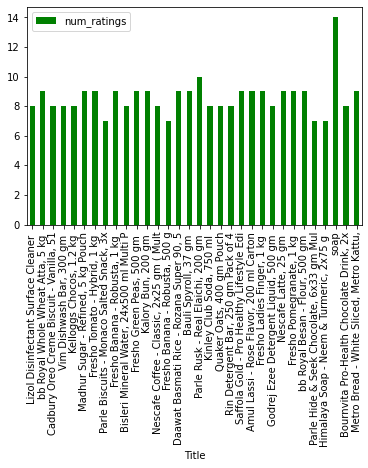

In [113]:
popular_df.plot(kind = 'bar',
        x = 'Title',
        y = 'num_ratings',
        color = 'green')

In [114]:
popular_df

,Title,category,image,num_ratings,avg_ratings
0,Lizol Disinfectant Surface Cleaner,Cleaninghousehold,1202437_4-lizol-disinfectant-surface-cleaner-c...,8,4.437500
1,"bb Royal Whole Wheat Atta, 5 kg",FoodgrainsoilMasala,40099240_8-bb-royal-whole-wheat-atta.jpg,9,4.388889
2,"Cadbury Oreo Creme Biscuit - Vanilla, 51",SnacksBrandedFoods,100423120_22-cadbury-oreo-creme-biscuit-vanill...,8,4.062500
3,"Vim Dishwash Bar, 300 gm",Cleaninghousehold,306160_20-vim-dishwash-bar.jpg,8,4.062500
4,"Kelloggs Chocos, 1.2 kg",SnacksBrandedFoods,30008601_8-kelloggs-chocos.jpg,8,3.937500
5,"Madhur Sugar - Refined, 5 kg Pouch",FoodgrainsoilMasala,214431_6-madhur-sugar-refined.jpg,9,3.833333
6,"Fresho Tomato - Hybrid, 1 kg",FruitVegetables,10000200_17-fresho-tomato-hybrid.jpg,9,3.833333
7,"Parle Biscuits - Monaco Salted Snack, 3x",SnacksBrandedFoods,1200146_3-parle-biscuits-monaco-salted-snack.jpg,7,3.785714
8,"Fresho Banana - Robusta, 1 kg",FruitVegetables,10000025_24-fresho-banana-robusta.jpg,9,3.666667
9,"Bisleri Mineral Water, 24x500 ml Multi P",Beverage,1200137_1-bisleri-mineral-water.jpg,8,3.625000
